#### First thing we want to do is load the file and check the file e.g. see the number of columns and rows it has.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
credit_df = pd.read_excel("data-CreditRisk.xls")

In [3]:
credit_df.shape

(1000, 11)

In [4]:
credit_df.describe(include = 'all')

,ID,Age,Sex,Job,Housing,SavingAccounts,CheckAccount,CreditAmount,Duration,Purpose,Risk
count,1000.000000,1000.000000,1000,996.000000,1000,817,606,997.000000,995.000000,1000,1000
unique,NaN,NaN,2,NaN,3,4,3,NaN,NaN,8,2
top,NaN,NaN,male,NaN,own,little,little,NaN,NaN,car,good
freq,NaN,NaN,690,NaN,713,603,274,NaN,NaN,337,700
mean,499.500000,35.546000,NaN,1.902610,NaN,NaN,NaN,3276.432297,20.896482,NaN,NaN
std,288.819436,11.375469,NaN,0.653981,NaN,NaN,NaN,2825.236506,12.083060,NaN,NaN
min,0.000000,19.000000,NaN,0.000000,NaN,NaN,NaN,250.000000,4.000000,NaN,NaN
25%,249.750000,27.000000,NaN,2.000000,NaN,NaN,NaN,1366.000000,12.000000,NaN,NaN
50%,499.500000,33.000000,NaN,2.000000,NaN,NaN,NaN,2323.000000,18.000000,NaN,NaN
75%,749.250000,42.000000,NaN,2.000000,NaN,NaN,NaN,3973.000000,24.000000,NaN,NaN


In [5]:
credit_df

,ID,Age,Sex,Job,Housing,SavingAccounts,CheckAccount,CreditAmount,Duration,Purpose,Risk
0,0,67,male,2.0,own,NaN,little,1169.0,6.0,radio/TV,good
1,1,22,female,2.0,own,little,moderate,5951.0,48.0,radio/TV,bad
2,2,49,male,1.0,own,little,NaN,2096.0,12.0,education,good
3,3,45,male,2.0,free,little,little,7882.0,42.0,furniture/equipment,good
4,4,53,male,2.0,free,little,little,4870.0,24.0,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1.0,own,little,NaN,1736.0,NaN,furniture/equipment,good
996,996,40,male,3.0,own,little,little,3857.0,30.0,car,good
997,10,25,female,2.0,rent,little,moderate,1295.0,12.0,car,bad
998,17,25,male,2.0,own,NaN,little,8072.0,30.0,business,good


#### Decide what columns are not needed - Majority of this can be done later, but if known for a fact that a column is not required than can drop it.

In [6]:
c_df = credit_df.drop(['ID'], axis=1)

In [7]:
c_df.tail()

,Age,Sex,Job,Housing,SavingAccounts,CheckAccount,CreditAmount,Duration,Purpose,Risk
995,31,female,1.0,own,little,NaN,1736.0,NaN,furniture/equipment,good
996,40,male,3.0,own,little,little,3857.0,30.0,car,good
997,25,female,2.0,rent,little,moderate,1295.0,12.0,car,bad
998,25,male,2.0,own,NaN,little,8072.0,30.0,business,good
999,27,male,2.0,own,moderate,moderate,4576.0,45.0,car,good


## Question 1. Data Analysis and Preparation (6 marks)

#### Check the number of values that are for unique elements in the Risk column

In [8]:
c_df.Risk.value_counts()

good    700
bad     300
Name: Risk, dtype: int64

#### Plot the number of values that are for unique elements in the Risk column

Text(0.5, 1.0, 'Count of risk scores')

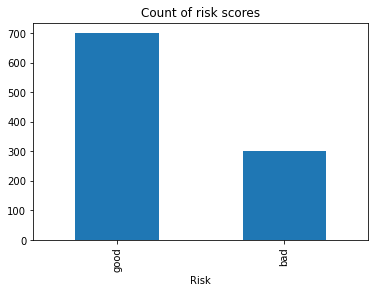

In [9]:
c_df['Risk'].value_counts().plot(kind='bar')
plt.xlabel('Risk')
plt.title("Count of risk scores")

Most of the existing customers are good customers. 700 are good whereas 300 are bad.

#### Bullet point 2

#### Check the mean values of different columns using Risk. E.g. Find the mean value of Good and Bad risk for Duration. This function below displays the mean values for all numeric columns

In [10]:
c_df.groupby(['Risk']).mean()

,Age,Job,CreditAmount,Duration
Risk,,,,
bad,33.963333,1.932886,3948.130435,24.860000
good,36.224286,1.889685,2988.699140,19.185612


#### Plot the mean values of the required data E.g. In this case plot the mean value of Good and Bad risk for Duration.

<AxesSubplot:title={'center':'Average Duration categorisd by Risk'}, xlabel='Risk', ylabel='Duration'>

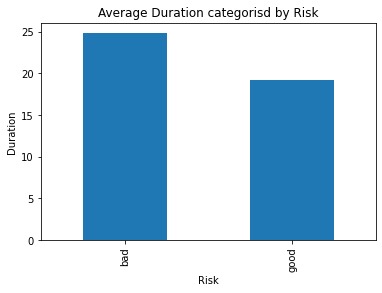

In [11]:
c_df.groupby(['Risk']).Duration.mean().plot(kind='bar', ylabel="Duration", title="Average Duration categorisd by Risk")


On average customers with a higher duration have worse/bad credit compared to customers with shorter durations. So customers that have higher durations are more likely to have bad credit whereas customers with shorter durations are more likely to have good credit.

#### Check the mean values of the required data E.g. In this case, the mean value of Sex risk for CreditAmount.

In [12]:
SexStats = c_df.groupby(['Sex']).CreditAmount.mean()

print(SexStats)

Sex
female    2877.774194
male      3456.321689
Name: CreditAmount, dtype: float64


#### Plot the mean values of the required data E.g. In this case plot the mean value of Sex risk for CreditAmount.

<AxesSubplot:title={'center':'Average CreditAmount by Sex Category'}, xlabel='Sex', ylabel='CreditAmount'>

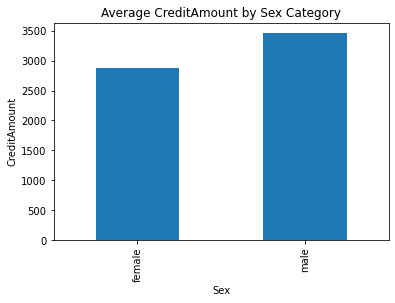

In [13]:
c_df.groupby(['Sex']).CreditAmount.mean().plot(kind='bar', ylabel="CreditAmount", title='Average CreditAmount by Sex Category')


Male customers on average have a higher credit than female customers.

#### Check the mean values of the required data E.g. In this case, the mean value of Good and Bad risk for CreditAmount.

In [14]:
RiskStats = c_df.groupby(['Risk']).CreditAmount.mean()
print(RiskStats)

Risk
bad     3948.130435
good    2988.699140
Name: CreditAmount, dtype: float64


#### Plot the mean values of the required data E.g. In this case plot the mean value of Good and Bad risk for CreditAmount.

<AxesSubplot:title={'center':'Average CreditAmount by Risk Category'}, xlabel='Risk', ylabel='CreditAmount'>

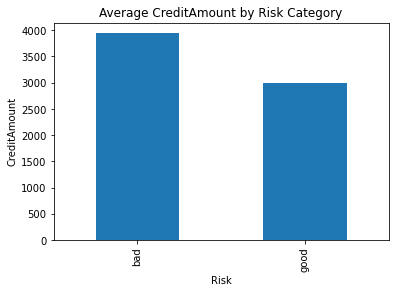

In [15]:
c_df.groupby(['Risk']).CreditAmount.mean().plot(kind='bar', ylabel="CreditAmount", title='Average CreditAmount by Risk Category')


Good customers on average have a smaller Credit than bad customers.

#### Check the number of people with type of Risk by Housing. E.g. Have different types of housing and inside of that check how many are Good risk and how many are Bad Risk

In [16]:
c_df.groupby(['Housing', 'Risk'])['Housing'].count().unstack('Risk')

Risk,bad,good
Housing,,
free,44,64
own,186,527
rent,70,109


#### Plot the number of people with type of Risk by Housing. E.g. Plot how many are Good risk and how many are Bad Risk in certain types of housing.

<AxesSubplot:title={'center':'Housing and Risk'}, xlabel='Housing', ylabel='Number of people'>

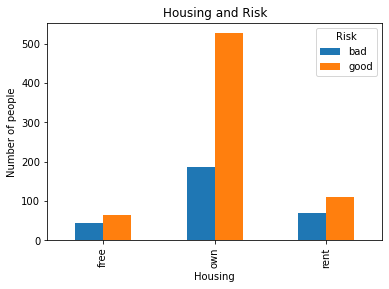

In [17]:
c_df.groupby(['Housing', 'Risk'])['Housing'].count().unstack('Risk').plot(kind='bar', ylabel='Number of people', title='Housing and Risk')


Customers who have free housing have a 64/(44+64) = 59.26% likelihood of having Good risk.

Customers who have own housing have a 527/(527+186) = 73.91% likelihood of having Good risk.

Customers who have rent houshing have a 109/(109+70) = 60.89% likelihood of having Good risk.

OWN housing is most likely to have good risk, RENT housing is 2nd most likely for good risk and FREE housing is least likely for good risk.

#### Check what columns are in your table and then check in your table if you have any missing values

In [18]:
c_df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'SavingAccounts', 'CheckAccount',
       'CreditAmount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [19]:
c_df.tail()

,Age,Sex,Job,Housing,SavingAccounts,CheckAccount,CreditAmount,Duration,Purpose,Risk
995,31,female,1.0,own,little,NaN,1736.0,NaN,furniture/equipment,good
996,40,male,3.0,own,little,little,3857.0,30.0,car,good
997,25,female,2.0,rent,little,moderate,1295.0,12.0,car,bad
998,25,male,2.0,own,NaN,little,8072.0,30.0,business,good
999,27,male,2.0,own,moderate,moderate,4576.0,45.0,car,good


In [20]:
c_df.isnull().sum()

Age                 0
Sex                 0
Job                 4
Housing             0
SavingAccounts    183
CheckAccount      394
CreditAmount        3
Duration            5
Purpose             0
Risk                0
dtype: int64

Issues with the dataset include a large number of missing values for SavingAccounts, CheckAccount. This is a big issue.

The potential issue these have is that you cannot use missing information to accurately predict. Additionally by filling these values, you may decrease the accuracy as if you randomly fill these values you may make your overall predictions less accurate.


Furthermore, SavingAccounts, CheckAccount, Purpose, Risk, Sex all have non-numeric values and thus cannot be used to train the AI. We need to map these values to a corresponding numerical value.


There are also a few values missing for CreditAmount, Duration, Job - But these are minor issues. These are all numeric values and thus any missing values can be replaced with the mean.




Show the steps of code to address the above observed issues with features. Briefly explain the reason to support your selected functions / methods. [1 mark]

<b>Answers</b>: 

- Job - Can take the mean job value. It will probably be a decimal number, but it will be more accurate than taking random job values.
- Savings Account - Delete as nearly 1/10 of values are missing - so not reliable to use.
- CheckAccount - Delete as nearly 1/3 of values are missing - So not reliable to use.
- CreditAmount - As its a number a average can be calculated, it will be more accurate than taking random
- Duration - As its a number a average can be calculated, it will be more accurate than taking random

#### Replace values with issues with fixed data. Use mean and drop any values that are missing significants amount of data as they will not be useful to the training of your AI.

In [21]:
import random

c_df = c_df.drop(['SavingAccounts'], axis=1)
c_df = c_df.drop(['CheckAccount'], axis=1)

a = c_df['CreditAmount'].mean()
c_df['CreditAmount'].fillna(a, inplace=True)
c_df

b = c_df['Duration'].mean()
c_df['Duration'].fillna(b, inplace=True)
c_df

c = c_df['Job'].mean()
c_df['Job'].fillna(c, inplace=True)
c_df

,Age,Sex,Job,Housing,CreditAmount,Duration,Purpose,Risk
0,67,male,2.0,own,1169.0,6.000000,radio/TV,good
1,22,female,2.0,own,5951.0,48.000000,radio/TV,bad
2,49,male,1.0,own,2096.0,12.000000,education,good
3,45,male,2.0,free,7882.0,42.000000,furniture/equipment,good
4,53,male,2.0,free,4870.0,24.000000,car,bad
...,...,...,...,...,...,...,...,...
995,31,female,1.0,own,1736.0,20.896482,furniture/equipment,good
996,40,male,3.0,own,3857.0,30.000000,car,good
997,25,female,2.0,rent,1295.0,12.000000,car,bad
998,25,male,2.0,own,8072.0,30.000000,business,good


#### Double check to make sure you have no null values.

In [22]:
c_df.isnull().sum()

Age             0
Sex             0
Job             0
Housing         0
CreditAmount    0
Duration        0
Purpose         0
Risk            0
dtype: int64

#### Check to see all the unique values in the different columns, so that you are able to replace the names of those unique values with numbers. Need to map words to a corresponding number value, so that AI can train.

In [23]:
Sex = c_df.Sex.value_counts()
Housing = c_df.Housing.value_counts()
Purpose = c_df.Purpose.value_counts()
Job = c_df.Job.value_counts()
Risk = c_df.Risk.value_counts()

print(Sex)
print(Housing)
print(Purpose)
print(Job)
print(Risk)
#Purpose of this is to see all the values I need to change to numbers

male      690
female    310
Name: Sex, dtype: int64
own     713
rent    179
free    108
Name: Housing, dtype: int64
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
vacation/others         12
domestic appliances     12
Name: Purpose, dtype: int64
2.00000    627
1.00000    200
3.00000    147
0.00000     22
1.90261      4
Name: Job, dtype: int64
good    700
bad     300
Name: Risk, dtype: int64


#### Drop existing columns and replace it with values that are numbers that correspond to the previous non-numerical values

In [24]:
t = c_df.drop(columns=['Sex'])
t['Sex'] = c_df['Sex'].map({'male': 0, 'female':1})
c_df = t

In [25]:
t = c_df.drop(columns=['Housing'])
t['Housing'] = c_df['Housing'].map({'own': 0, 'rent':1, 'free':2})
c_df = t

In [26]:
t = c_df.drop(columns=['Purpose'])
t['Purpose'] = c_df['Purpose'].map({'car': 0, 'radio/TV':1, 'furniture/equipment': 2, 'business':3, 'education':4, 'repairs':5, 'domestic appliances':6, 'vacation/others':7})
c_df = t

In [27]:
t = c_df.drop(columns=['Risk'])
t['Risk'] = c_df['Risk'].map({'good': 0, 'bad':1})
c_df = t

In [28]:
c_df

,Age,Job,CreditAmount,Duration,Sex,Housing,Purpose,Risk
0,67,2.0,1169.0,6.000000,0,0,1,0
1,22,2.0,5951.0,48.000000,1,0,1,1
2,49,1.0,2096.0,12.000000,0,0,4,0
3,45,2.0,7882.0,42.000000,0,2,2,0
4,53,2.0,4870.0,24.000000,0,2,0,1
...,...,...,...,...,...,...,...,...
995,31,1.0,1736.0,20.896482,1,0,2,0
996,40,3.0,3857.0,30.000000,0,0,0,0
997,25,2.0,1295.0,12.000000,1,1,0,1
998,25,2.0,8072.0,30.000000,0,0,3,0


In [29]:
c_df.describe()

,Age,Job,CreditAmount,Duration,Sex,Housing,Purpose,Risk
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.902610,3276.432297,20.896482,0.310000,0.395000,1.435000,0.300000
std,11.375469,0.652671,2820.991219,12.052784,0.462725,0.674856,1.527779,0.458487
min,19.000000,0.000000,250.000000,4.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,2.000000,1369.750000,12.000000,0.000000,0.000000,0.000000,0.000000
50%,33.000000,2.000000,2325.500000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,42.000000,2.000000,3972.250000,24.000000,1.000000,1.000000,2.000000,1.000000
max,75.000000,3.000000,18424.000000,72.000000,1.000000,2.000000,7.000000,1.000000


#### Place the data into 2 different sections. Purpose of this is to train the AI. Target is what the AI is trying to predict whereas the data is what the AI uses as its information to come to its result. Place the data you want to predict into the target and place the data you want to use for predictions into data.

In [30]:
data = c_df[['Age', 'Sex', 'Job', 'Housing', 'CreditAmount', 'Duration', 'Purpose']]
target = c_df['Risk']

#### Once again check if your data is null, If there are any null values that can cause issues with training the AI. AI may not be very accurate if there are null values.

In [31]:
data.isnull().sum()

Age             0
Sex             0
Job             0
Housing         0
CreditAmount    0
Duration        0
Purpose         0
dtype: int64

In [32]:
target.isnull().sum()

0

## Artificial Neural Networks (ANN) 

#### Import all libaries that are used for training a Artificial Neural Network (ANN) and import libraries to test the accuracy of your ANN.

In [807]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

These are the input features:
data = c_df[['Age', 'Sex', 'Job', 'Housing', 'CreditAmount', 'Duration', 'Purpose']]

This is the target feature:
target = c_df['Risk']

All of these values are numeric values.

The dataset is split into 30% is used for testing and 70% of the data is used for training.

#### Split data into testing data and training data.

In [824]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3)

#### Train a ANN with a number of neurons of your choosing. And choose the number of hidden-layers you want. In this example, there will be one hidden-layer with 5 neurons.

In [825]:
ann1 = MLPClassifier(hidden_layer_sizes=(5), max_iter=3000)
ann1.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=5, max_iter=3000)

#### Check the training and testing accuracy of your model to see if it is any good
If your testing accuracy is higher than your training accuracy it means that your data is biased towards one class.

In [848]:
###Training Accuracy
x_pred = ann1.predict(x_train)
print('Training accuracy:', metrics.accuracy_score(y_train, x_pred))

Training accuracy: 0.7242857142857143


In [849]:
#Testing Accuracy
y_pred = ann1.predict(x_test)
print('Testing accuracy:', metrics.accuracy_score(y_test, y_pred))

Testing accuracy: 0.6966666666666667


ann1 is good model to predict new customers, because it has a accuracy of 69.67%, this is nearly 70% so that means every 7/10 people would be correctly assigned.

#### Plot a confusion matrix, so that you can see how your ANN predicts.

In [828]:
def cf_matrix(mat, t_name):

    fig, ax = plt.subplots()
    im = ax.imshow(mat)

    ax.set_xticks(range(0,len(t_name)))
    ax.set_yticks(range(0,len(t_name)))
    ax.set_xticklabels(t_name)
    ax.set_yticklabels(t_name)

    for i in range (0, len(t_name)):
        for j in range (0, len(t_name)):
            text = ax.text(j, i, mat[i, j], ha = "center", va="center", color="w")
        
    plt.ylabel('true label')
    plt.xlabel('predicted label')

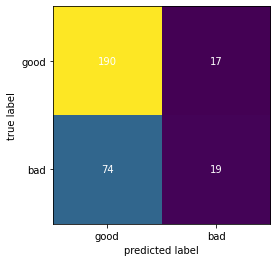

In [829]:
cm=confusion_matrix(y_test, y_pred)
target_names = ['good', 'bad']
cf_matrix(cm, target_names)

The confusion matrix reveals that the main error comes from classifying 'bad' risk. The neural network only correctly classifies 19/(19+74) = 20.04% as bad risk. While the model can classify 190/(190+17) = 91.79% of good risk correctly. 

Overall, the classification accuracy is 190+19/(190+17+74+19) = 69.67% (matching the above accuracy calculated using metrics.accuracy_score(y_test, y_pred)

### Build and evaluate another ANN

#### Using the same data split. Train a new ANN with a new number of neurons of your choosing and/or a new number of hidden-layers you want. In this example, there will be 3 hidden-layer with 7 neurons.

In [830]:
ann2 = MLPClassifier(hidden_layer_sizes=(7,7,7), max_iter=3000)
ann2.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(7, 7, 7), max_iter=3000)

ANN2 Has 3 hidden layers, each with 7 neurons.

#### Check the training and testing accuracy of your model.

In [846]:
###Training Accuracy
x_pred = ann2.predict(x_train)
print('Training accuracy:', metrics.accuracy_score(y_train, x_pred))

Training accuracy: 0.6714285714285714


In [847]:
#Testing Accuracy
y_pred = ann2.predict(x_test)
print('Testing accuracy:', metrics.accuracy_score(y_test, y_pred))

Testing accuracy: 0.66


ann2 is not a bad model, but it is not good as it has an accuracy of 66%. It is an okay score because it is better than if a person were to randomly guess because a person would have a 50% chance at getting it right and it has a 16% better accuracy than that.

#### Plot another confusion matrix, so that you can see how your new ANN predicts.

In [839]:
def cf_matrix(mat, t_name):

    fig, ax = plt.subplots()
    im = ax.imshow(mat)

    ax.set_xticks(range(0,len(t_name)))
    ax.set_yticks(range(0,len(t_name)))
    ax.set_xticklabels(t_name)
    ax.set_yticklabels(t_name)

    for i in range (0, len(t_name)):
        for j in range (0, len(t_name)):
            text = ax.text(j, i, mat[i, j], ha = "center", va="center", color="w")
        
    plt.ylabel('true label')
    plt.xlabel('predicted label')

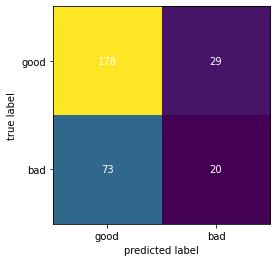

In [840]:
cm=confusion_matrix(y_test, y_pred)
target_names = ['good', 'bad']
cf_matrix(cm, target_names)

The confusion matrix reveals that the main error comes from classifying good risk. 

The neural network only correctly classifies 178/(178+29) = 85.99% as good risk. While the model can classify 20/(73+20) = 21.51% of bad risk correctly. 

Overall, the classification accuracy is 178+20/(178+29+73+20)= 66% (matching the above accuracy calculated using metrics.accuracy_score(y_test, y_pred). 


ann1 is more accurate than ann2, even though ann2 is more accurate at classifying bad risk overall. It is 4% less accurate than ann1. So overall, ann1 is not much better by alot. However ann1 is still a better model than ann2.

#### Use cross-validation to take an average of the accuracy for you different ANN models. It is possible that in the instance you checked before that it happened to be more accurate, but when you check for average accuracy it is less accurate.

In [857]:
acc_ann1 = cross_val_score(ann1, data, target, cv=10, scoring='accuracy').mean()
acc_ann1

acc_ann2 = cross_val_score(ann2, data, target, cv=10, scoring='accuracy').mean()
acc_ann2

print(acc_ann1)
print(acc_ann2)

0.697
0.663


Using cross-validation and taking the average of the 2 ann models. ann1 has an average accuracy of 69.7% whereas ann2 has an average accuracy of 66.3%. ann2 is better at classifying bad risk (being worse at classifying good risk) and ann1 is better at classifying good risk (being worse at classifying bad risk)

ann1 however is better because on average it is able to predict correctly more often than ann2.

## Decision Tree

### Build and evaluate your first decision tree 

#### Using the same data split. Train a decision tree with a depth of 3. Also import the necessary libaries, so that it is possible to train a decision tree, plot a decision tree and check the accuracy.

In [356]:
from sklearn.model_selection import train_test_split

In [357]:
from sklearn.tree import DecisionTreeClassifier

dt1 = DecisionTreeClassifier(max_depth=3).fit(x_train, y_train)

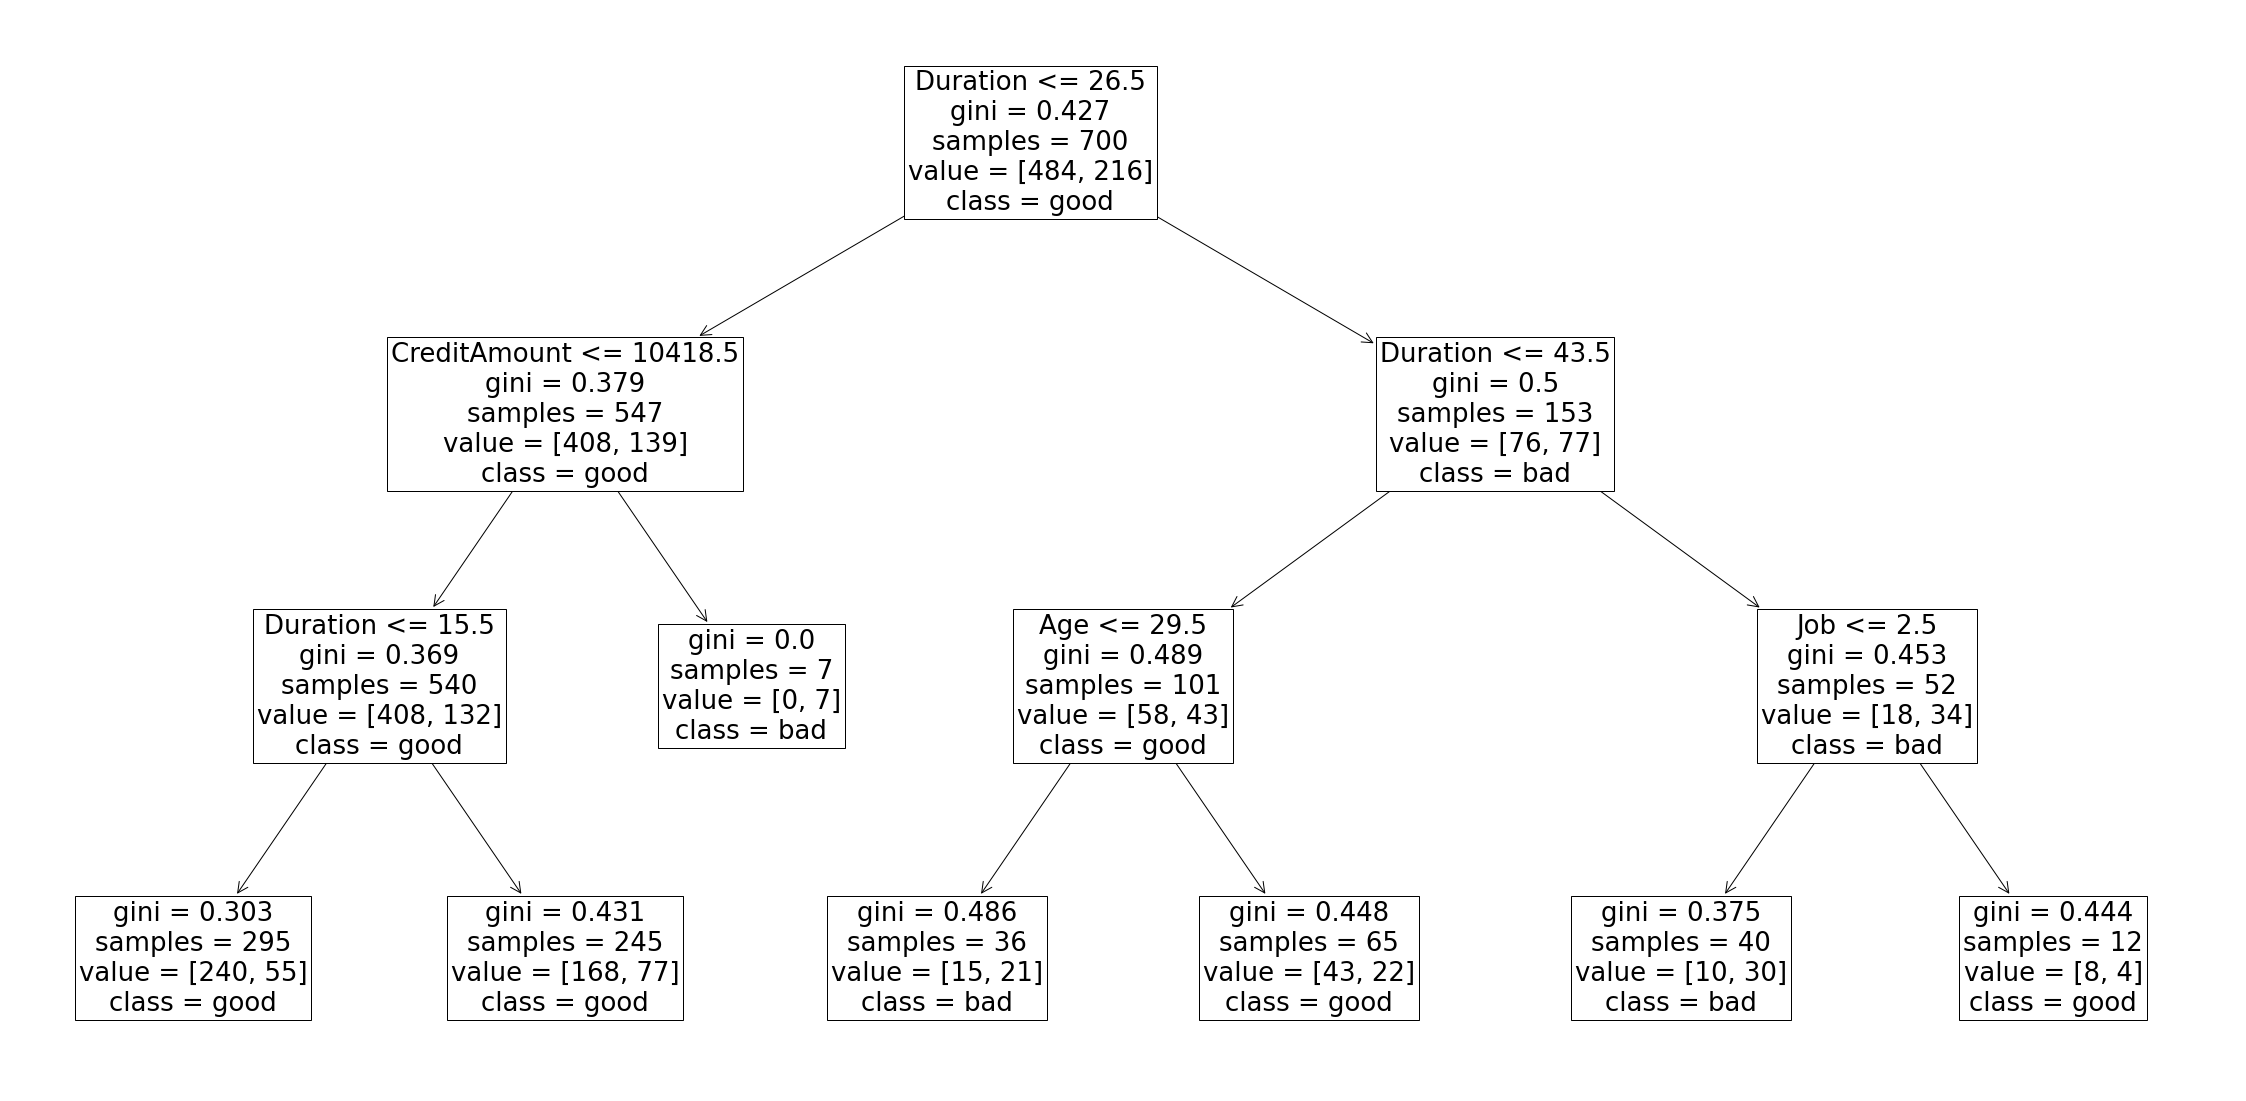

In [358]:
from sklearn import tree

target_names = ['good', 'bad']

plt.figure(figsize=(40,20))
_ = tree.plot_tree(dt1, feature_names = data.columns, class_names=target_names, fontsize=26)
plt.show()

#### Check the training and testing accuracy of your decision tree to see if it is any good.

In [359]:
#Training Accuracy
x_pred = dt1.predict(x_train)
print('Testing accuracy:', metrics.accuracy_score(y_train, x_pred))


Testing accuracy: 0.7385714285714285


In [360]:
#Testing Accuracy
y_pred = dt1.predict(x_test)
print('Testing accuracy:', metrics.accuracy_score(y_test, y_pred))

Testing accuracy: 0.6933333333333334


dt1 is a good model when classifying new customers as it has 69.33% accuracy which is nearly every 7/10 people are accuractely classified.

#### Plot another confusion matrix, so that you can see how your DT predicts. Gives visual representation of accuracy.

In [361]:
def cf_matrix(mat, t_name):

    fig, ax = plt.subplots()
    im = ax.imshow(mat)

    ax.set_xticks(range(0,len(t_name)))
    ax.set_yticks(range(0,len(t_name)))
    ax.set_xticklabels(t_name)
    ax.set_yticklabels(t_name)

    for i in range (0, len(t_name)):
        for j in range (0, len(t_name)):
            text = ax.text(j, i, mat[i, j], ha = "center", va="center", color="w")
        
    plt.ylabel('true label')
    plt.xlabel('predicted label')

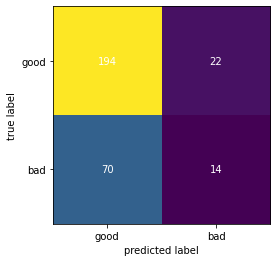

In [362]:

cm=confusion_matrix(y_test, y_pred)
target_names = ['good', 'bad']
cf_matrix(cm, target_names)

DT1 is good at predicting good customer. It correctly predicted 194/(194+22) = 89.81%. It is terrible at predicting bad customers. For example it only correctly classified 14/(70+14) = 16.67%

Overall accuracy is (194+14)/(194+22+70+14) = 69.33% which matches the accuracy calculated by the accuracy_score

### Build another decision tree
Observe which input feature affects the accuracy of the most (using k-fold cross-validation).

#### Use different data e.g. Make a new label called data2 and add the same data columns to it except for 1 column and use the same target. Using this and the same depth train a new Decision Treee (DT). 

In [369]:
data2 = c_df[['Age', 'Sex', 'Job', 'Housing', 'CreditAmount', 'Purpose']]
target2 = c_df['Risk']

In [370]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data2, target2, test_size=0.30)

In [375]:
from sklearn.tree import DecisionTreeClassifier

dt2 = DecisionTreeClassifier(max_depth=3).fit(x_train, y_train)

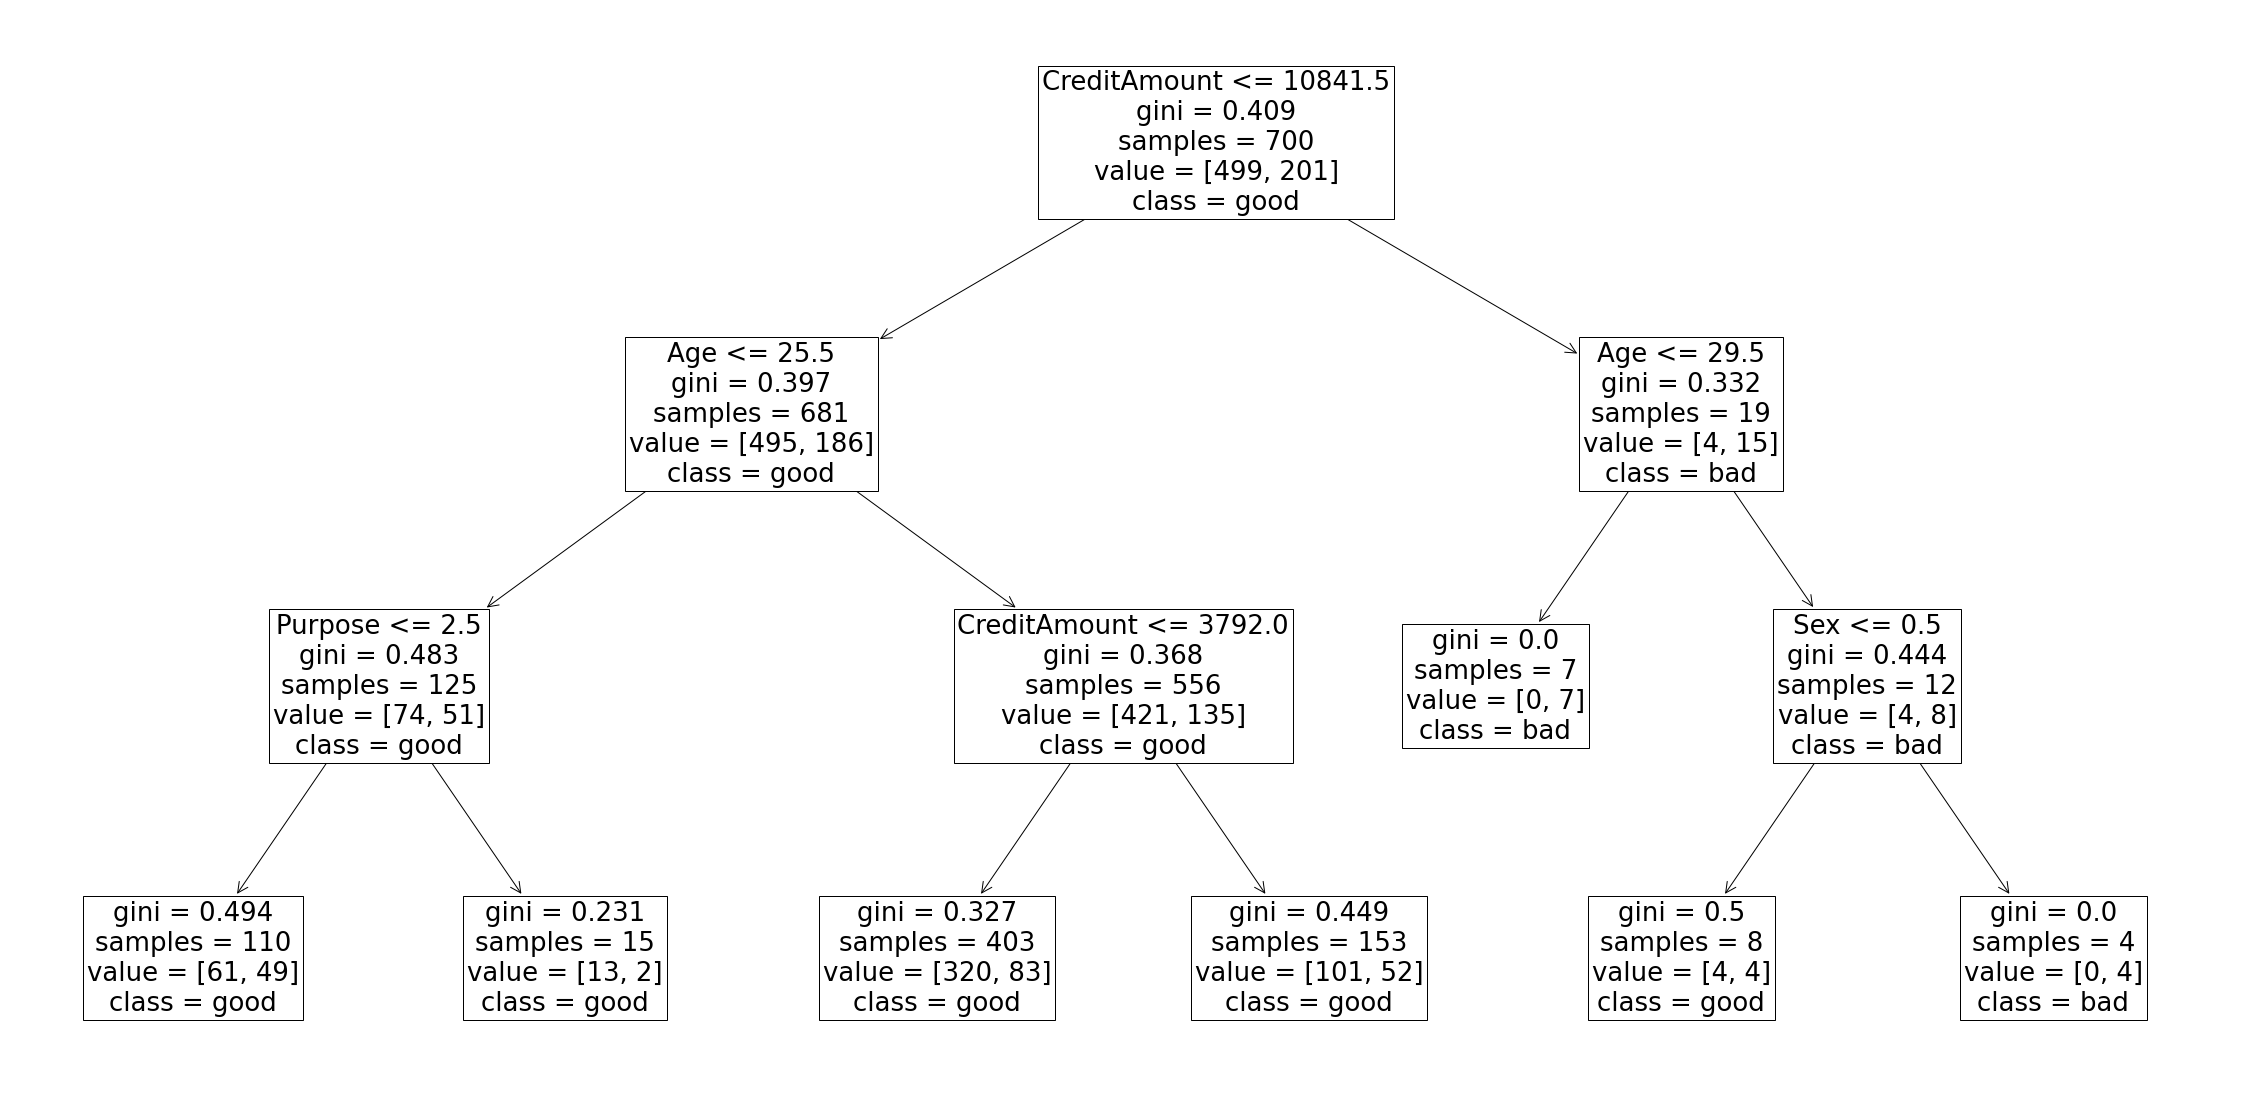

In [376]:
from sklearn import tree

target_names = ['good', 'bad']

plt.figure(figsize=(40,20))
_ = tree.plot_tree(dt2, feature_names = data2.columns, class_names=target_names, fontsize=26)
plt.show()

#### Check the training and testing accuracy

In [377]:
#Training Accuracy
x_predict = dt2.predict(x_train)
print('Testing accuracy:', metrics.accuracy_score(y_train, x_predict))


Testing accuracy: 0.7285714285714285


In [378]:
#Testing Accuracy
y_predict = dt2.predict(x_test)
print('Testing accuracy:', metrics.accuracy_score(y_test, y_predict))

Testing accuracy: 0.6766666666666666


#### Accuracy Testing for different input features. Remove a different input each time and check its accuracy.

In [904]:
target = c_df['Risk']

dataT0 = c_df[['Age', 'Sex', 'Job', 'Housing', 'CreditAmount', 'Duration', 'Purpose']]
dataT1 = c_df[['Age', 'Sex', 'Job', 'Housing', 'CreditAmount', 'Duration'           ]]
dataT2 = c_df[['Age', 'Sex', 'Job', 'Housing', 'CreditAmount',             'Purpose']]
dataT3 = c_df[['Age', 'Sex', 'Job', 'Housing',                 'Duration', 'Purpose']]
dataT4 = c_df[['Age', 'Sex', 'Job',            'CreditAmount', 'Duration', 'Purpose']]
dataT5 = c_df[['Age', 'Sex',        'Housing', 'CreditAmount', 'Duration', 'Purpose']]
dataT6 = c_df[['Age',        'Job', 'Housing', 'CreditAmount', 'Duration', 'Purpose']]
dataT7 = c_df[[       'Sex', 'Job', 'Housing', 'CreditAmount', 'Duration', 'Purpose']]

#### Split these different datas into training and testing and train the the new DTs.

In [905]:
x_train0, x_test0, y_train0, y_test0 = train_test_split(dataT0, target, test_size=0.30)
Adt0 = DecisionTreeClassifier(max_depth=3).fit(x_train0, y_train0)

x_train1, x_test1, y_train1, y_test1 = train_test_split(dataT1, target, test_size=0.30)
Adt1 = DecisionTreeClassifier(max_depth=3).fit(x_train1, y_train1)

x_train2, x_test2, y_train2, y_test2 = train_test_split(dataT2, target, test_size=0.30)
Adt2 = DecisionTreeClassifier(max_depth=3).fit(x_train2, y_train2)

x_train3, x_test3, y_train3, y_test3 = train_test_split(dataT3, target, test_size=0.30)
Adt3 = DecisionTreeClassifier(max_depth=3).fit(x_train3, y_train3)

x_train4, x_test4, y_train4, y_test4 = train_test_split(dataT4, target, test_size=0.30)
Adt4 = DecisionTreeClassifier(max_depth=3).fit(x_train4, y_train4)

x_train5, x_test5, y_train5, y_test5 = train_test_split(dataT5, target, test_size=0.30)
Adt5 = DecisionTreeClassifier(max_depth=3).fit(x_train5, y_train5)

x_train6, x_test6, y_train6, y_test6 = train_test_split(dataT6, target, test_size=0.30)
Adt6 = DecisionTreeClassifier(max_depth=3).fit(x_train6, y_train6)

x_train7, x_test7, y_train7, y_test7 = train_test_split(dataT7, target, test_size=0.30)
Adt7 = DecisionTreeClassifier(max_depth=3).fit(x_train7, y_train7)

#### Check the accuracies of these different decision trees

In [910]:
from sklearn.model_selection import cross_val_score


acc0 = cross_val_score(Adt0, dataT0, target, cv=10, scoring='accuracy').mean()
acc1 = cross_val_score(Adt1, dataT1, target, cv=10, scoring='accuracy').mean()
acc2 = cross_val_score(Adt2, dataT2, target, cv=10, scoring='accuracy').mean()
acc3 = cross_val_score(Adt3, dataT3, target, cv=10, scoring='accuracy').mean()
acc4 = cross_val_score(Adt4, dataT4, target, cv=10, scoring='accuracy').mean()
acc5 = cross_val_score(Adt5, dataT5, target, cv=10, scoring='accuracy').mean()
acc6 = cross_val_score(Adt6, dataT6, target, cv=10, scoring='accuracy').mean()
acc7 = cross_val_score(Adt7, dataT7, target, cv=10, scoring='accuracy').mean()

print('Everything included:', acc0)
print('Missing Purpose:',acc1)
print('Missing Duration:',acc2)
print('Missing CreditAmount:',acc3)
print('Missing Housing:',acc4)
print('Missing Job:',acc5)
print('Missing Sex:',acc6)
print('Missing Age:',acc7)

Everything included: 0.691
Missing Purpose: 0.691
Missing Duration: 0.6910000000000001
Missing CreditAmount: 0.6880000000000001
Missing Housing: 0.697
Missing Job: 0.698
Missing Sex: 0.691
Missing Age: 0.694


#### Look at which accuracy has the biggest difference from the initial accuracy

The input feature which affects the accuracy the most is Job. When Job is removed you get 69.8% accuracy. Which is the biggest change from the starting point of 0.691 (where no inputs are removed) 0.698 - 0.691 = 0.007

Show the confusion matrix of <i>dt2</i> and compare it with that of <i>dt1</i>. How accurate is <i>dt1</i> and <i>dt2</i> (% accuracy) predicting 'bad' customers, respectively? [2 marks]

#### Plot a confusion matrix to visually see how dt2 makes predictions

In [381]:
def cf_matrix(mat, t_name):

    fig, ax = plt.subplots()
    im = ax.imshow(mat)

    ax.set_xticks(range(0,len(t_name)))
    ax.set_yticks(range(0,len(t_name)))
    ax.set_xticklabels(t_name)
    ax.set_yticklabels(t_name)

    for i in range (0, len(t_name)):
        for j in range (0, len(t_name)):
            text = ax.text(j, i, mat[i, j], ha = "center", va="center", color="w")
        
    plt.ylabel('true label')
    plt.xlabel('predicted label')

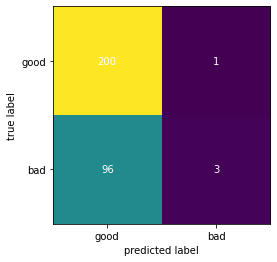

In [382]:

cm=confusion_matrix(y_test, y_predict)
target_names = ['good', 'bad']
cf_matrix(cm, target_names)

dt2 is good at predicting good customer.It correctly predicts 200/(200+1) = 99.50%. It is terrible at predicting bad customers. For example. It only correctly classified 3/(96+3) = 3.03%

Overall accuracy is (200+3)/(200+1+96+3) = 67.66% which matches the accuracy calculated by the accuracy_score

#### Compare dt1 to dt2 and check which model is better at predicting bad customers
dt1 has an accuracy of 16.67% when predicting bad customers and dt2 has an accuracy of 3.03%, so dt1 is better at predicting bad customers than dt2.

A bank manager would prefer dt1. dt1 is better at predicting bad customers with 16.67% accuracy. It is worse at predicting good customers, but it is still 89.81%.

dt2 is worse at predicting bad customers with 3.03% accuracy and better at predicting good customers with 99.50% accuracy. 

Overall the bank manager would prefer dt1 because on average it has a higher accuracy which is 69.33%, Approximately every 7/10 people are correctly predicted. This is 3% higher accuracy than dt2.

### Tuning your decision trees

#### Use a loop to increment depth and check which depth leads to greatest accuracy.

In [913]:
k_range = range(2,8)
k_scores = []
for k in k_range:
    dt3 = DecisionTreeClassifier(max_depth=k).fit(x_train, y_train)
    scores = cross_val_score(dt3, data2, target, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

acc_dt = max(k_scores)
acc_dt

0.7050000000000001

#### Plot how the accuracy changes with depth.

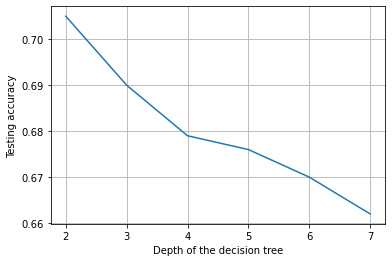

In [914]:
plt.plot(k_range, k_scores)
plt.xlabel('Depth of the decision tree')
plt.ylabel('Testing accuracy')
plt.xticks(k_range)
plt.grid(axis='both')

The tree depth selected would be 2 as it gives the greatest accuracy. Additionally with a tree depth of 2. The decision tree will be very simple to follow and thus the decision making process is very easy to follow and very clear to see how the AI got to its result.

### Decision making with the decision tree

#### Take the decision tree with the highest average accuracy. E.g. The tuned decision tree has the highest average accuracy. Take the depth with the highest average accuracy and use it to plot the decision tree.

In [901]:
dt3 = DecisionTreeClassifier(max_depth=2).fit(x_train, y_train)

<b>Answers</b>: 

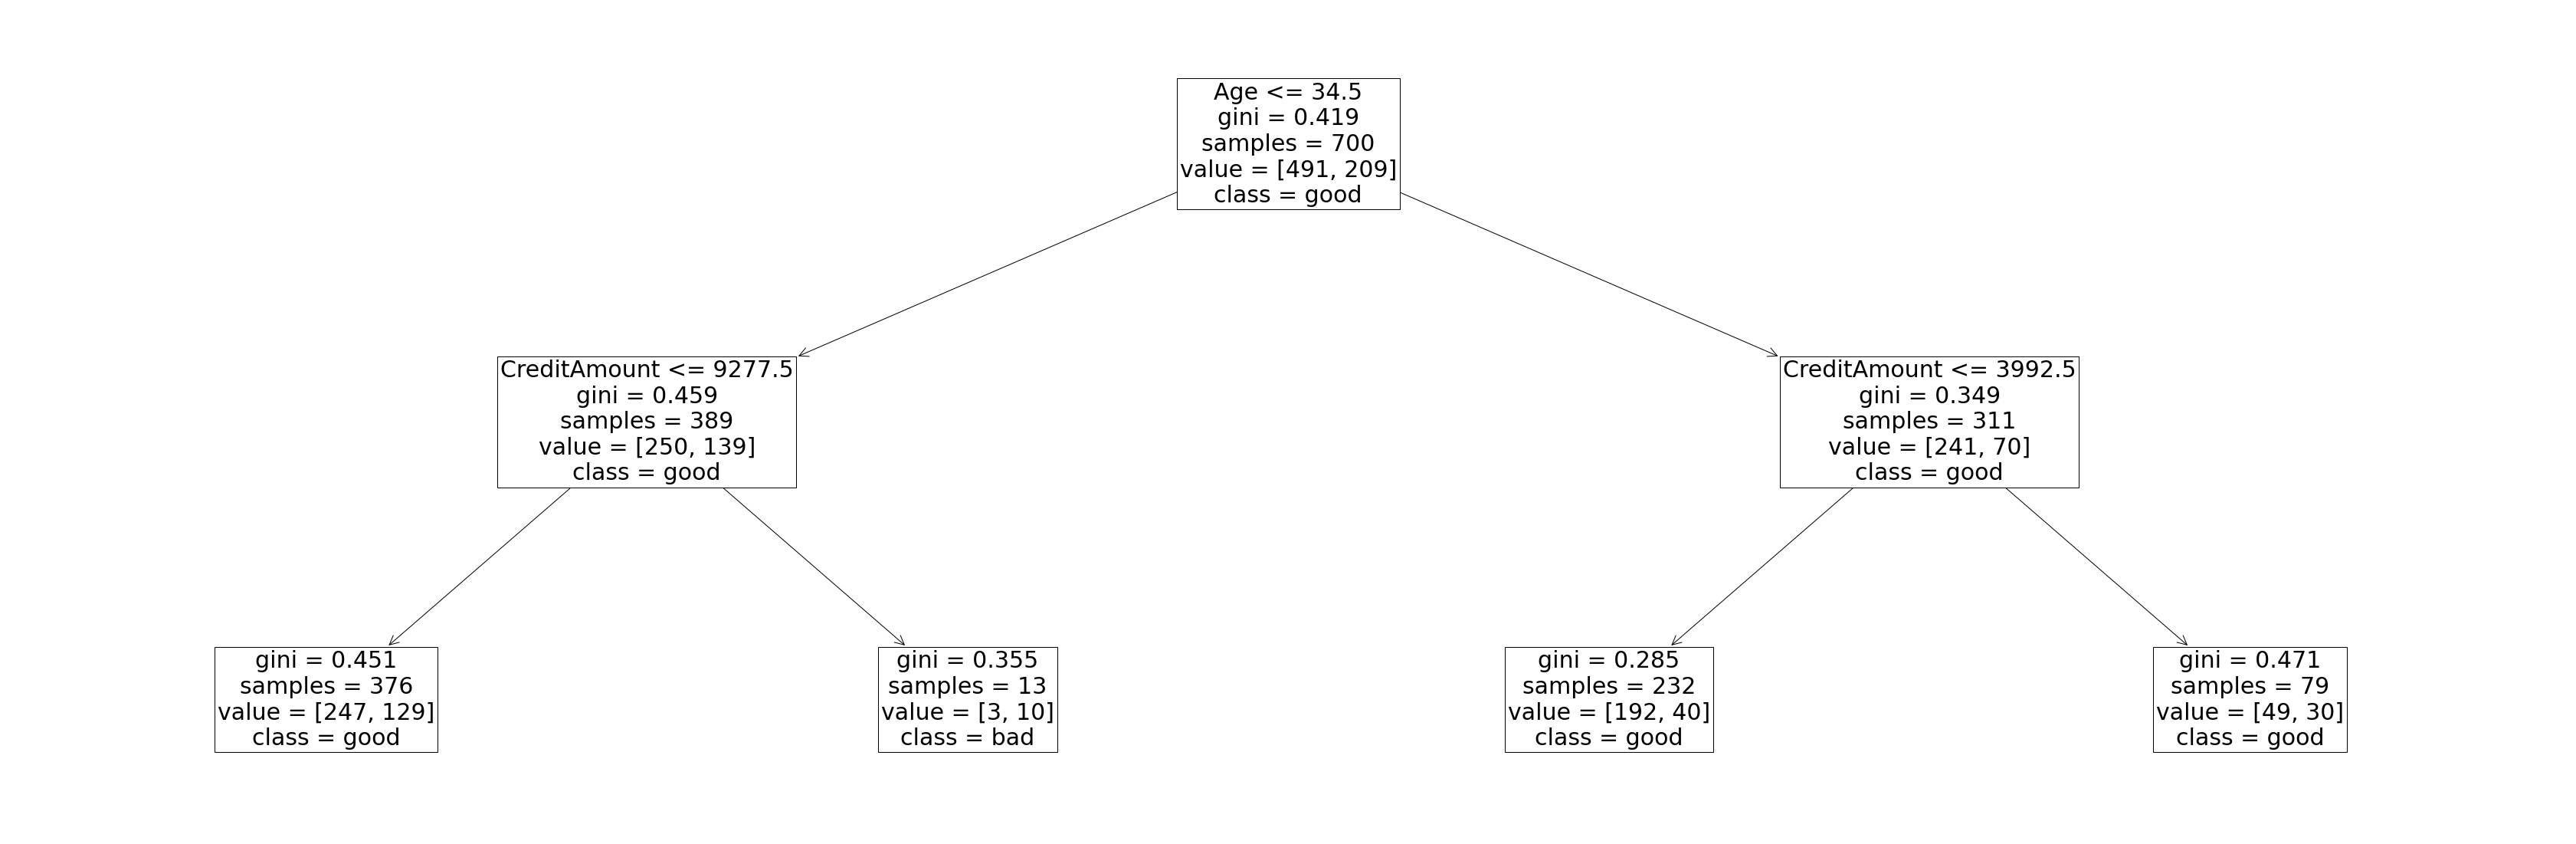

In [902]:
from sklearn import tree

target_names = ['good', 'bad']

plt.figure(figsize=(60,20))
_ = tree.plot_tree(dt3, feature_names = data2.columns, class_names=target_names, fontsize=30)
plt.show()

Example:

If I have a Customer that is 20 years old and has a creditAmount of 20,000. Then the decision tree will classify that customer using the first node which checks if the customer is less than 34.5 years old. This is true, so it checks the left branch. It checks at the next node that if the customer has a creditAmount less than or equal to 9277.5. The customer creditAmount is greater than this, so this is false and it checks the right branch and comes to the last node where the customer is classified as bad.

#### Check accuracy of decision tree (Should be highest accuracy)

In [903]:
from sklearn import metrics

y_predict = tree_d2.predict(x_test)
print(metrics.accuracy_score(y_test, y_predict))

0.72


What happens if a new <i>customer A</i> of age 40 with CheckAmount of 2000 applies to a loan according to the best decision tree.

According to my best decision tree - If a new customer A of age 40 with CheckAmount/CreditAmount 2000 applies for a loan then the bank manager should grant the loan. 

My decision tree on the first node asks if age is less than or equal to 25.5. The age of the customer is 40, so it greater than 34.5. It then checks the right branch. It checks whether the CreditAmount is less than or equal 3992.5. The Customers CreditAmount is 2000 so it is less than 3992.5. It then branches to the left again reaching the final node where the customer is classified as good.

Based on my above analysis my Best Decision tree has an accuracy score of 72% whereas my best Artificial Neural Network has an accuracy of 69.67%. Thus making the Decision tree more accurate than the Artificial Neural Network. Additionally as the bank manager it is much easier to see how the AI has gotten to its result. The problem with a ANN is that even though the weights can be displayed it is difficult to understand and see how the AI has made its decision. It is much clearer from the use of a Decision Tree how the AI has come to its decision.